<a href="https://colab.research.google.com/github/sdlanda77/portfolio/blob/main/Sam_L_hw4_release.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 (40 points)

A robot is wandering around a room with some obstacles, labeled as $\#$ in the grid below. It can occupy any of the free cells labeled with a letter, keeping a belief distribution over its current location. At each timestep it moves from its current cell to a neighboring free cell in one of the four cardinal directions with uniform probability; it cannot stay in the same cell. For example, from A the robot can move to either B or D with probability $\frac12$, while from B it can move to A, C, or E, each with probability $\frac13$.

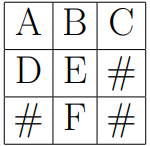

The robot also makes an observation after each transition, returning what it sees in a randomly chosen cardinal direction. Possibilities include observing $#$, "wall", or "empty" (for a free cell). For example, in A the robot observes "wall" and "empty", each with probability $\frac12$; in C the robot observes "wall" with probability $\frac12$, "empty" $\frac14$, and $\#$ $\frac14$.

**Note**: You don't have to show work for solving linear equations or eigenvectors, but please show what equations or matrices you use. Feel free to show your work in Python as well. You may also omit computations that will turn out to be zero based on the provided information.




1.  Suppose that the robot wanders around forever without making observations. What is the stationary distribution over the robot's predicted location? 

2. The initial distribution $X_0$ is uniform over all possible states. The robot makes a transition and observes $e_1 = \#$. It then makes a second transition and again observes $e_2 = \#$. What are the belief distributions $\Pr(X_1 \mid e_1)$ and $\Pr(X_2 \mid e_1, e_2)$?

4. Compute the joint distribution $\Pr(X_1, X_2 \mid e_1, e_2)$. Hint: First determine the state sequences with a nonzero probability.

5. Are the states $X_1$ and $X_2$ independent given $e_1$ and $e_2$? Why or why not? What is the most likely state sequence of $X_1$ and $X_2$?

ENTER YOUR RESPONSES HERE

1.   T is a transition matrix for the grid, states A - F.
          T = [[0,0.33,0,0.5,0,0],
              [0.5,0,1,0,0.33,0],
              [0,0.33,0,0,0,0],
              [0.5,0,0,0,0.33,0],
              [0,0.33,0,0.5,0,1],
              [0,0,0,0,0.33,0]]

The stationary distribution is represented as a vector v: $$<a,b,c,d,e,f>$$ With $\lambda = 1$ we have $Tv=1*v$, which gives the equations: $$ a = 0.33b + 0.5d, b=0.5a + c +0.33e, c = 0.33b, d=0.5a+0.33e, e=0.33b+0.5d+f, f= 0.33e $$ Since v is a transition matrix, all elements will sum to 1, or $$a+b+c+d+e+f=1$$ We solve the linear equation and find that $$v= <1/6,1/4,1/12,1/6,1/4,1/12>$$


2. $f_{t} = P(X_{t} | e_{1:t})$

Therefore, we are looking for $f_{1}$ and $f_{2}$. $f_{0}=P(X_{0})=<1/6,1/6,1/6,1/6,1/6, 1/6>$ and $T$ is the same as problem 1. $$f'_{1} = Tf_{0} = <5/36,11/36,2/36,5/36,11/36,2/36>$$ $$O_{1}f'_{1} = <0,0,1/72,5/144,11/144,1/36>$$ Divide by $11/72$ to normalize: $$f_{1} = P(X_{1} | e_{1}) = <0,0,1/11,5/22,1/2,2/11>$$

$$f'_{2} = Tf_{1} = <5/44,17/66,0,1/6,13/44,1/6>$$ $$O_{2}f'_{2} = <0,0,0,1/24,13/176,1/12>$$ Divide by $35/176$ to normalize: $$f_{2}= P(X_{2} | e_{1:2}) = <0,0,0,22/108,13/35,44/105>$$

3. $P(X_{1}, X_{2} | e_{1}, e_{2}) = \frac{P(X_{1}, X_{2},e_{1}, e_{2})}{P(e_{1}, e_{2})}$. The denominator will be a constant, so we ignore it here and normalize at the end. State sequences with nonzero probability given $e_{1} = e_{2} = # $: (D,E), (E,D), (E,F), (F,E). We can calculate the probabilities of these specific pairs using the distributions.

$P(X_{1} = D, X_{2} = E,e_{1}, e_{2}) = P(X_{1} = D | e_{1}) * P(X_{2} = E| e_{1:2})$. From above we get: $5/22 * 13/35 = 13/154$

$P(X_{1} = E, X_{2} = D,e_{1}, e_{2}) = P(X_{1} = E | e_{1}) * P(X_{2} = D| e_{1:2})$. From above we get: $ 1/2 * 22/108 = 11/108$

$P(X_{1} = E, X_{2} = F,e_{1}, e_{2}) = P(X_{1} = E | e_{1}) * P(X_{2} = F| e_{1:2})$. From above we get: $1/2 * 44/105 = 22/105$

$P(X_{1} = F, X_{2} = E,e_{1}, e_{2}) = P(X_{1} = F | e_{1}) * P(X_{2} = E| e_{1:2})$. From above we get: $2/11 * 13/35 = 26/385$

Therefore $P(X_{1}, X_{2},e_{1}, e_{2})$ is given by the 6x6 matrix A where $A_{𝑖𝑗}=𝑃(𝑋_{1}  = j, 𝑋_{2} =i, e_{1}, e_{2})$ and (in other words, the row is the first state and the column is the second): 
          
          P = [[0,0,0,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,13/154,0],
              [0,0,0,11/108,0,22/105],
              [0,0,0,0,26/385,0]]

Normalize the matrix (divide each element by 0.46):

          P = [[0,0,0,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0.18,0],
              [0,0,0,0.22,0,0.45],
              [0,0,0,0,0.15,0]]

4. No, $X_{1}$ and $X_{2}$ are not independent given $e_{1}$ and $e_{2}$ becasue the distibution for $X_{2}$ is calculated following the distribution for $X_{1}$. Furthermore, $P(X_{2} | X_{1}) = T*(T*P(X_{0}))$ and $P(X_{2} | X_{1}, e_{1}, e_{2}) = f_{2}$ from above. Since the first element of $f_{2}$ is zero, we just need to know that the first element of $T*(P(X_{0})*T$ is nonzero to prove they are not independent. $T*P(X_{0} = Tf_{0} = <5/36,11/36,2/36,5/36,11/36,2/36>$ from above and $T(Tf_{0})$ will therefore have the first element $37/216$. Since these two instances are not equal, $X_{1}$ and $X_{2}$ are not independent given $e_{1}$ and $e_{2}$.

The most likely state sequence is (E,F), since that is the maximum element is the array above. 

In [ ]:
# ENTER ANY CODE FOR PROBLEM 1 HERE

import numpy as np
#done by hand


# POS Tagging

In this assignment you will explore [part-of-speech (POS) tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging), a standard task in natural language processing. The goal is to identify parts of speech and related labels for each word in a given corpus. HMMs are well suited for this problem, with parts of speech being hidden states and the words themselves being observations.

We will be using data from the English EWT treebank from [Universal Dependencies](https://universaldependencies.org/treebanks/en_ewt/index.html), which uses 17 POS tags. We are providing clean versions of training and test data for you. The data format is such that each line contains a word and associated tag, and an empty lines signifies the end of a sentence. Feel free to open the files in a text editor to get an idea.

Start by uploading both files to the Jupyter session storage (you should do this each time that you start a new session). Then run the following code cells.

In [ ]:
import numpy as np

def read_sentence(f):
  sentence = []
  while True:
    line = f.readline()
    if not line or line == '\n':
      return sentence
    line = line.strip()
    word, tag = line.split("\t", 2)
    sentence.append((word, tag))

def read_corpus(file):
  f = open(file, 'r', encoding='utf-8')
  sentences = []
  while True:
    sentence = read_sentence(f)
    if sentence == []:
      return sentences
    sentences.append(sentence)

In [ ]:
training = read_corpus('train.upos.tsv')
TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 
        'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']
NUM_TAGS = len(TAGS)

alpha = 0.1
tag_counts = np.zeros(NUM_TAGS)
transition_counts = np.zeros((NUM_TAGS,NUM_TAGS))
obs_counts = {}

for sent in training:
  for i in range(len(sent)):
    word = sent[i][0]
    pos = TAGS.index(sent[i][1])
    tag_counts[pos] += 1
    if i < len(sent)-1:
      transition_counts[TAGS.index(sent[i+1][1]), pos] += 1
    if word not in obs_counts:
      obs_counts[word] = np.zeros(NUM_TAGS)
    (obs_counts[word])[pos] += 1

X0 = tag_counts / np.sum(tag_counts)
TPROBS = transition_counts / np.sum(transition_counts, axis=0)
OPROBS = {'#UNSEEN': alpha*np.ones(NUM_TAGS)}
for word, counts in obs_counts.items():
  OPROBS[word] = np.divide(counts, tag_counts+alpha)

The preceding cell estimates the parameters of the HMM model by going through all the training data and counting each tag, word, and transition that appears. ```X0``` is a numpy array storing the initial distribution of tags. ```TPROBS``` is the transition matrix, in the form of a 2d numpy array. ```OPROBS``` is a dictionary of 1d numpy arrays, with keys as the words appearing in the training data and their values being 1d numpy arrays of the emission probabilities. 

Notice that we're including one extra "tag" in ```OPROBS```: an ```#UNSEEN``` tag. This is necessary because we will inevitably encounter words in the test dataset that we have not seen before. For any word that we have not seen, we treat it as if the word is just ```#UNSEEN```. We assign the "count" of an ```#UNSEEN``` word to a constant value $\alpha$, so that it acts as Laplacian smoothing.

## Coding 1 (5 points)

Before we build our HMM, let's try a simplistic unigram model: given a new word, assign it the POS tag giving it the highest emission probability. Context of surrounding words is therefore not considered. This can be done by taking the ```argmax``` of the emission probabilities for the given word in OPROBS. Remember that we treat all words that did not appear before as ```#UNSEEN```. Complete the function below to achieve this (make sure to actually return the POS tag itself, not the tag index).

In [ ]:
def unigram(obs):
  # Returns the tag of the word obs, as predicted by a unigram model
  # YOUR CODE HERE
  
  value = OPROBS.get(obs)
  tag_index = NUM_TAGS - 1
  if value is None:
    value = OPROBS.get('#UNSEEN')
  
  tag_index = np.argmax(value)
  return TAGS[tag_index]

Test out your unigram model by running the cell below, which will tag the specified data and compute accuracy rates over all words and unseen words only. 

In [ ]:
def evaluate(sentences, method):
  correct = 0
  correct_unseen = 0
  num_words = 0
  num_unseen_words = 0

  for sentence in sentences:
    words = [sent[0] for sent in sentence]
    pos = [sent[1] for sent in sentence]
    unseen = [word not in OPROBS for word in words]
    if method == 'unigram':
      predict = [unigram(w) for w in words]
    elif method == 'viterbi':
      predict = viterbi(words)
    else:
      print("invalid method!")
      return

    if len(predict) != len(pos):
      print("incorrect number of predictions")
      return
    correct += sum(1 for i,j in zip(pos, predict) if i==j)
    correct_unseen += sum(1 for i,j,k in zip(pos, predict, unseen) if i==j and k)
    num_words += len(words)
    num_unseen_words += sum(unseen)
  
  print("Accuracy rate on all words: ", correct/num_words)
  if num_unseen_words > 0:
    print("Accuracy rate on unseen words: ", correct_unseen/num_unseen_words)

print("Training data evaluation")
evaluate(training, 'unigram')
test = read_corpus('test.upos.tsv')
print("")
print("Test data evaluation")
evaluate(test, 'unigram')

Training data evaluation
Accuracy rate on all words:  0.9066014359235022

Test data evaluation
Accuracy rate on all words:  0.8191417300872614
Accuracy rate on unseen words:  0.07678883071553229


## Response 1 (5 points)

You should see that accuracy on the training data is about 90\%. Accuracy on the test data set is lower at about 82\%, with accuracy on unseen words only being about 7.7\% (only somewhat better than random chance).

Why is accuracy on the training set not 100\%, despite the model having seen the entirety of that data set before?

We generalize our model to avoid overfitting, in this case using additive smoothing. If we did not generalize our models, they would be a lot less useful on new testing set that strays from the patterns of the training data. This generalization is therefore necessary but means that the accuracy will only be around 90% even on training data that we've already seen in entirity. 

## Coding 2 (10 points)

We will now implement Viterbi to improve our performance over the unigram model. We will split the implementation into several subroutines. First complete the ```elapse_time``` function below. Given a distribution ```m```, it should return an updated "distribution" that occurs when applying the Viterbi update in one timestep. In addition, it should also return a list with the *indices* of the most likely prior tag for each current tag.

As a hint, these will correspond to ```max``` and ```argmax``` operations, respectively.

In [ ]:
def elapse_time(m):
  """
  Given a "message" distribution over tags, return an updated distribution
  after a single timestep using Viterbi update, along with a list of the 
  indices of the most likely prior tag for each current tag
  """
  mprime = np.zeros(NUM_TAGS)
  prior_tags = np.zeros(NUM_TAGS, dtype=np.int8)
  #YOUR CODE HERE
  
  #find mprime
  for i in range(TPROBS.shape[0]):
    mprime[i] = np.max(np.multiply(TPROBS[i],m))
  
  #find prior_tags
  for i in range(TPROBS.shape[0]):
    prior_tags[i] = np.argmax(np.multiply(TPROBS[i],m))

  return mprime, prior_tags

print(elapse_time(X0)[0])

[0.01760448 0.03555192 0.00856414 0.02886908 0.01286977 0.03107597
 0.00131929 0.04729066 0.00355399 0.00759845 0.01917727 0.01772987
 0.05017312 0.00486164 0.00066568 0.02484413 0.00200137]


You can check your implementation above by finding $m_1'$ given $m_0 = X_0$. It should approximately look like
```
[0.01760448, 0.03555192, 0.00856414, 0.02886908, 0.01286977,
 0.03107597, 0.00131929, 0.04729066, 0.00355399, 0.00759845,
 0.01917727, 0.01772987, 0.05017312, 0.00486164, 0.00066568,
 0.02484413, 0.00200137]
```

## Coding 3 (5 points)

The second step of the Viterbi algorithm is to reweight probabilities according to observations. Given the "time elapsed" message distribution ```mprime``` and an ```obs``` (a word), the function below should return an updated distribution weighted by the emission probabilities for this observation. Remember to account for unseen words by using the ```#UNSEEN``` word.

In [ ]:
def observe(mprime, obs):
  """
  Given a "message" distribution over tags, return an updated distribution
  by weighting mprime by the emission probabilities corresponding to obs
  """
  m = np.zeros(NUM_TAGS)
  # YOUR CODE HERE
  value = OPROBS.get(obs)
  if value is None:
    value = OPROBS.get('#UNSEEN')
  m = np.multiply(value, mprime)

  return m

print(observe(elapse_time(X0)[0], 'multiply'))

[1.76044808e-03 3.55519219e-03 8.56414346e-04 2.88690786e-03
 1.28697667e-03 3.10759674e-03 1.31928571e-04 4.72906597e-03
 3.55399416e-04 7.59844668e-04 1.91772652e-03 1.77298721e-03
 5.01731218e-03 4.86163502e-04 6.65677893e-05 2.48441334e-03
 2.00136540e-04]


You can check your implementation above by finding $m_1$ given $m_1'$ and an observation of your choosing. If the observation is an ```#UNSEEN``` word, you should find that $m_1$ looks something like 
```
[1.76044808e-03, 3.55519219e-03, 8.56414346e-04, 2.88690786e-03,
       1.28697667e-03, 3.10759674e-03, 1.31928571e-04, 4.72906597e-03,
       3.55399416e-04, 7.59844668e-04, 1.91772652e-03, 1.77298721e-03,
       5.01731218e-03, 4.86163502e-04, 6.65677893e-05, 2.48441334e-03,
       2.00136540e-04]
```

## Coding 4 (20 points)

You will now put the two functions you wrote above together into one wrapper ```viterbi``` function. Given a list of word observations, it should return a corresponding list of predicted tags. As you hopefully recall, Viterbi runs in two phases. The "forward" phase starts with the ```X0``` distribution and goes through the observations one at a time, modifying the message distribution through time and observation updates for each. You should maintain a growing list of most likely tag pointers that is returned from each elapse time update.

The second phase then goes backward. Starting with the tag with the highest likelihood at the end, follow the pointers backward to find the most likely tag for each observation. These tags should then be returned as one overall list of tags when finished (make sure the list of tags is in the right order!).

In [ ]:
def viterbi(observations):
  """
  Given a list of word observations, return a list of predicted tags
  """
  m = X0
  pointers = []
  # YOUR CODE HERE
  # "Forward" phase of the Viterbi algorithm
  for obs in observations:
    elapse = elapse_time(m)
    m = observe(elapse[0], obs)
    pointers.append(elapse[1])
  
  # "Backward" phase of the Viterbi algorithm
  tags = []
  tags.append(np.argmax(m))
  for i in range(len(pointers) - 1):
    tags.append(pointers[len(pointers) - 1 - i][tags[i]])
  tags.reverse()
  for i in range(len(tags)):
      t = TAGS[tags[i]]
      tags[i] = t
  return tags

print(viterbi(['#UNSEEN']))  
print(viterbi(['#UNSEEN', '#UNSEEN']))
print(viterbi(['#UNSEEN', '#UNSEEN', '#UNSEEN']))

['PUNCT']
['DET', 'NOUN']
['ADP', 'DET', 'NOUN']


Again, we recommend that you check your implementation with small test cases. For example, running ```viterbi(['#UNSEEN'])``` (or any unseen word in place of ```#UNSEEN```) should return ```['PUNCT']```, the most likely tag from the ```observe()``` unit test above. On the other hand, running ```viterbi(['#UNSEEN', '#UNSEEN'])```, or Viterbi on two unseen words in a row, will actually return ```['DET', 'NOUN']```.

## Response 2 (5 points)

Explain why the tag prediction is completely different for one unseen word vs two unseen words in a row. Do the predictions make sense in the context of the English language (you can see the tag descriptions on UD's [website](https://universaldependencies.org/u/pos/))? What is the tag sequence prediction for three unseen words in a row?

The tag prediction is completely different for one unseen word and two unseen words becasue the argmax(m) is the first entry in the list, and with the additional round of elapse_time() and observe() call, m is a different list. (One unseen gives argmax(m)=12 and two unseens gives argmax(m)=7.) This means there is a different tag with the highest liklihood at the end, which will result in a different traceback of the most likely sequence and therefore the tag prediction list will be different. 

The predictions do make sense in the context of the English language. Being that few pieces of punctuation are commonly used, it makes sense that an unseen word would likely be punctuation without any other context. The patter DET, NOUN also make sense intuitively becasue the pattern of a determiner followed by a noun is extremely common in English language (ex. a dog). Three unseens result in the pattern (ADP, DET, NOUN), which also makes sense intuitively in the Enlish language. Adposition, determinator, noun (ex. in the house) is a very common pattern.

Once you are confident of your implementation, you can run it on the full training and test data sets. You should find that both accuracy rates are better than those of the unigram model, at about 95\% for the training set and (more importantly) 88\% for the test set. What's more, the accuracy rate on unseen words should be about 32\%, a very significant improvement over the unigram predictor.

In [ ]:
print("Training data evaluation")
evaluate(training, 'viterbi')
print("")
print("Test data evaluation")
evaluate(test, 'viterbi')

Training data evaluation
Accuracy rate on all words:  0.9527973138748919

Test data evaluation
Accuracy rate on all words:  0.883133442244093
Accuracy rate on unseen words:  0.3267888307155323


Viterbi's performance is held back by its accuracy rate on unseen words. One option is to build a higher-order HMM, e.g. a trigram model with transitions determined by the previous two states rather than one state. 

An alternative fix is to consider the emission probabilities of the ```#UNSEEN``` tag. As you saw in the second coding cell that learns the parameters, the ```#UNSEEN``` tag gets the same count of ```alpha``` for all POS tags. This is equivalent to saying that in a typical corpus, the distribution of unseen words is uniform across all tags. This is not a great assumption; there are probably many more nouns or verbs that we have not encountered than conjunctions or punctuation marks.

Instead of a uniform distribution, it may be more reasonable to assume that the distribution of unseen words is similar to that of words that appear only once in the training set. These words are known as [*hapax legomena*](https://en.wikipedia.org/wiki/Hapax_legomenon).

## Coding 5 (10 points)

Complete the ```hapax_POS_counts``` function below. Given a dictionary ```obs_counts```, which maps a word to a numpy array counting the number of times it occurred as each POS tag, identify all words with a total count of 1. Add up the POS tag occurrences for each of these words, and return the total POS tag counts over all hapax legomena words.

In [ ]:
def hapax_POS_counts(obs_counts):
  """
  Given a dictionary of word to count arrays, return the total number 
  of POS tag appearances only for the words with a total count of 1
  """
  # YOUR CODE HERE
  hapax_counts = np.zeros(NUM_TAGS)
  for count in obs_counts.values():
    if np.sum(count) == 1:
      hapax_counts[np.argmax(count)] += 1
  return hapax_counts


You can check your hapax distribution by verifying that the POS tags of hapax legomena tend to be those associated with a greater diversity of words. Adjectives, verbs, nouns, and proper nouns would fall into these categories.

Once you've successfully produced a distribution of hapax legomena POS tags, run the cell below. ```OPROBS``` will be recomputed using the new distribution, and Viterbi will be run again on the test data set. The accuracy rate on all words should see a slight tick up, but the accuracy on unseen words should see a marked improvement to about 47\%. This means that we can correctly tag almost half of words that we have never encountered!

In [ ]:
hapax = hapax_POS_counts(obs_counts)
for word, counts in obs_counts.items():
  OPROBS[word] = np.divide(counts, tag_counts + hapax)
OPROBS['#UNSEEN'] = np.divide(hapax, tag_counts + hapax)

print("Test data evaluation")
evaluate(test, 'viterbi')

Test data evaluation
Accuracy rate on all words:  0.8970793321910986
Accuracy rate on unseen words:  0.4738219895287958
